# Examining ice sheet data in python with `Pandas`
#### And exploring some basics of data analysis in python/Jupyter along the way.

## Overview

Here we'll use the python `Pandas` package instead of Excel to examine some of the data we've been working with in our first two assignments.

We'll start with a broader introduction of using python for geospatial analyses.

We'll see how easy it is to:
1. Read CSV/text datasets
2. Generate summary statistics
3. Sub-sample data, including by time
4. Create quality plots of data
5. Implement some basic programming logic to classify and flag data


## Intent

Get your feet wet with Python because:
* It's useful for seeing that there are other, perhaps easier/quicker/better ways of exploring data.
* It could help you with assignments in this class.
* It could be relevant to your research (in and out of this class).
* Working with data is a fundamental, transferrable skill (beyond this class and beyond Penn State).

## Acknowledgements and learning resources

* Intro/background material here was mostly pulled from the excellent presentation of [David Shean (UW)](https://dshean.github.io/) during the [2020 ICESat-2 Hackweek](https://github.com/ICESAT-2HackWeek/2020_ICESat-2_Hackweek_Tutorials/blob/master/05.Geospatial_Analysis)
    * I **highly** recommend this and his [presentation available on Youtube](https://www.youtube.com/watch?v=46vxJYqUMsM&t)
* CU EarthLab's Earth Analytics Python Course: https://www.earthdatascience.org/courses/earth-analytics-python/
* Geohackweek: https://geohackweek.github.io/
* ICESat-2 hackweek: https://icesat-2hackweek.github.io/



***

## The big picture: the scientific Python landscape

* Python
* Jupyter/iPython
* NumPy, Pandas, Matplotlib, SciPy
* xarray, scikit-learn

One (aging) interpretation of this stack:

![2017 Scientific Python Stack](https://devopedia.org/images/article/60/7938.1587985662.jpg)  
Slide from Jake VanderPlas’s presentation at PyCon 2017, entitled “The Unexpected Effectiveness of Python in Science.”

## The geospatial Python landscape
* [GDAL](https://gdal.org/), [GEOS](https://trac.osgeo.org/geos), [PROJ](https://proj.org/)
* [rasterio](https://rasterio.readthedocs.io/en/latest/), [fiona](https://pypi.org/project/Fiona/), [shapely](https://pypi.org/project/Shapely/), [pyproj](https://pypi.org/project/pyproj/)
* [geopandas](https://geopandas.org/), [cartopy](https://scitools.org.uk/cartopy/docs/latest/), [xarray](http://xarray.pydata.org/en/stable)

## Pandas

`Pandas` is an incredibly useful data science toolkit, regardless of what your specific applications are. 

Think of it as a free, more efficient, more elegant, more replicable replacement for Excel.

>pandas is a Python package providing fast, flexible, and expressive data structures designed to make working with "relational" or "labeled" data both easy and intuitive. It aims to be the fundamental high-level building block for doing practical, real world data analysis in Python. Additionally, it has the broader goal of becoming the most powerful and flexible open source data analysis / manipulation tool available in any language. It is already well on its way towards this goal.

https://github.com/pandas-dev/pandas#main-features

If you are working with tabular data (rows and columns, like a csv or spreadsheet), especially time series data, `pandas` is a good solution.
* A better way to deal with tabular data, built on top of NumPy arrays
* With NumPy, you need to remember which column number (e.g., 3, 4) represented each variable (date, t2m, rh, etc)
* Pandas allows you to store data with different types, and then reference using more meaningful labels
    * NumPy: `aws18_df[:,2]`
    * Pandas: `aws18_df['TTT [°C] (at 2m height']`
* A good "10-minute" reference with examples: https://pandas.pydata.org/docs/user_guide/10min.html#min

If you are working with more complex data, like collections of tabular time series data from 100s of met stations or netCDF model output, you can use [`xarray` package](http://xarray.pydata.org/en/stable/), which extends the `pandas` data model to n-dimensions.
* Note: we will be using `xarray` when reading RACMO netCDF data in part 2 of A3 and future assignments.
* A good "45-minute" introduction from OceanHackWeek 2020: https://xarray-contrib.github.io/xarray-tutorial/oceanhackweek-2020/xarray-oceanhackweek20.html

***

# Part 1: Examining sediment and ice core archives
These data were previously used in Assignment 1 this semester.

Before we get going, we need to import various packages we'll be working with to read, analyze, and plot the data. 

In [1]:
# for data reading
import pandas as pd

# for plotting
import matplotlib.pyplot as plt

# seaborn adds some extra visual appeal to our plots
import seaborn as sns

# set some universal plot settings here
plt.rcParams["figure.dpi"] = 200 # default plot dpi
sns.set_style('darkgrid') # see: https://seaborn.pydata.org/tutorial/aesthetics.html
sns.set_context("notebook", font_scale=0.65) 
%config InlineBackend.figure_format = 'retina' # make high res plots for high res displays

Now that `Pandas` is imported, we can call it and its functions using `pd` or `Matplotlib` with `plt`.

## Part 1a: Reading LR04 data

Data source: https://www.ncei.noaa.gov/pub/data/paleo/contributions_by_author/lisiecki2005/lisiecki2005.txt

Local file: `data/lisiecki2005.txt`

We can easily read the LR04 data using `pandas`, but it'll need some special treatment because:
1. Like many text datasets, there's a large header (that we need to skip)
2. There are multiple datasets in the same file (so we need specify the number of rows to read), and
3. The data are separated by multiple spaces, but of variable width. 

First, let's define a variable with the dataset location/name:

In [2]:
lr04_datafile = 'data/lisiecki2005.txt'

Let's start by printing the data out here using the command line utility `cat` with the flag -n to show line numbers.

* Look for the row numbers where the data start, and for this partcular dataset, also where the data end. 

* Once you've noted these, use the blue bar on the left of the output to minimize it.

We can use command line functions using a `!` within Jupyter notebooks and pass variables using `$` signs, like:




In [3]:
!cat -n $lr04_datafile

     1	LR04 Global Pliocene-Pleistocene Benthic d18O Stack 
     2	---------------------------------------------------------------------
     3	                NOAA Paleoclimatology Program
     4	                               and
     5	         World Data Center for Paleoclimatology, Boulder
     6	---------------------------------------------------------------------
     7	NOTE: PLEASE CITE ORIGINAL REFERENCE WHEN USING THIS DATA!!!!!
     8	
     9	
    10	NAME OF DATA SET: LR04 Global Pliocene-Pleistocene Benthic d18O Stack 
    11	LAST UPDATES: 8/2005 (Change number of significant digits in LR04 stack)
    12	              7/2005 (final version, 0.64 permil correction for Cibicidoides added)
    13	CONTRIBUTOR: Lorraine E. Lisiecki, Brown University
    14	IGBP PAGES/WDCA CONTRIBUTION SERIES NUMBER: 2005-008
    15	
    16	
    17	SUGGESTED DATA CITATION: Lisiecki, L.E. and M.E. Raymo.  2005.
    18	LR04 Global Pliocene-Pleistocene Benthic d18O Stack.
    19	IGBP PAGES/World Dat

We'll read the LR04 data into python using the `pandas.read_csv` function (see https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html).

Above, we can see that the data start on line 89 and end on line 2204. So, we should tell pandas to skip the first 88 rows using `skiprows`, and then read the next 2115 using `nrows` (2204 minus 89)

Let's also tell pandas that the data are delimited based on white space using `delim_whitespace=True`. Alternatively, we could use a regular expression telling pandas that the data are separted by multiple spaces (`sep=r'\s+'`). Different datasets often come in different, non-standard formats, and so it may be necessary to quickly google "how to read data separated by xxxx with pandas". Typically this involves just using a different expression for `sep=`.

Lastly, let's specify that the 'Time' column should be our index column (the column to which the other columns are referenced) by setting `index_col='Time'`.

In [4]:
lr04_df = pd.read_csv(lr04_datafile, skiprows=88, nrows=2115, delim_whitespace=True, index_col='Time')

This loads the LR04 data as a `pandas.DataFrame`, enabling us to use a ton of functions to explore the data.
* See: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

For example, let's use pandas DataFrame functions `.head` and `.tail` to verify that the start and end of the DataFrame look good.

In [5]:
lr04_df.head()

,d18O,Error
Time,,
0.0,3.23,0.03
1.0,3.23,0.04
2.0,3.18,0.03
3.0,3.29,0.03
4.0,3.30,0.03


In [6]:
lr04_df.tail()

,d18O,Error
Time,,
5300.0,2.91,0.06
5305.0,2.79,0.04
5310.0,2.79,0.09
5315.0,2.84,0.07
5320.0,2.91,0.09


We can also use the `.describe` function to get some useful stats (though, admittedly, these are not the most useful for this limited dataset here, but we'll come back to this later). 

In [7]:
lr04_df.describe()

,d18O,Error
count,2115.000000,2115.000000
mean,3.718369,0.057560
std,0.541490,0.017222
min,2.650000,0.000000
25%,3.260000,0.050000
50%,3.700000,0.060000
75%,4.120000,0.070000
max,5.080000,0.140000


Now that we're seeing the data, note that one other somewhat odd thing about the LR04 dataset is that the time units are in 1000s of years before present. Let's make this more standard, and convert time to years before present.

Since we set the time column as our `index_col` when we read the data, we can reference this by calling `lr04_df.index`. 

If we didn't originally set the time column as our index, we'd just reference is as one of the other fields of the DataFrame, e.g., `lr04_df['Time']`

In [8]:
# multiply the index value by 1000 (convert from 1000s years bp to years bp)
# (make sure to only run this once!)
lr04_df.index = lr04_df.index*1000
lr04_df.index

Float64Index([      0.0,    1000.0,    2000.0,    3000.0,    4000.0,    5000.0,
                 6000.0,    7000.0,    8000.0,    9000.0,
              ...
              5275000.0, 5280000.0, 5285000.0, 5290000.0, 5295000.0, 5300000.0,
              5305000.0, 5310000.0, 5315000.0, 5320000.0],
             dtype='float64', name='Time', length=2115)

By printing the modified `lr04_df.index` above, we can now see that the data go from 0 to 5.32 million years ago. Perfect.

Now we can use the pandas `DataFrame.plot` function to make a quick plot of the d18O data:

<AxesSubplot:xlabel='Time'>

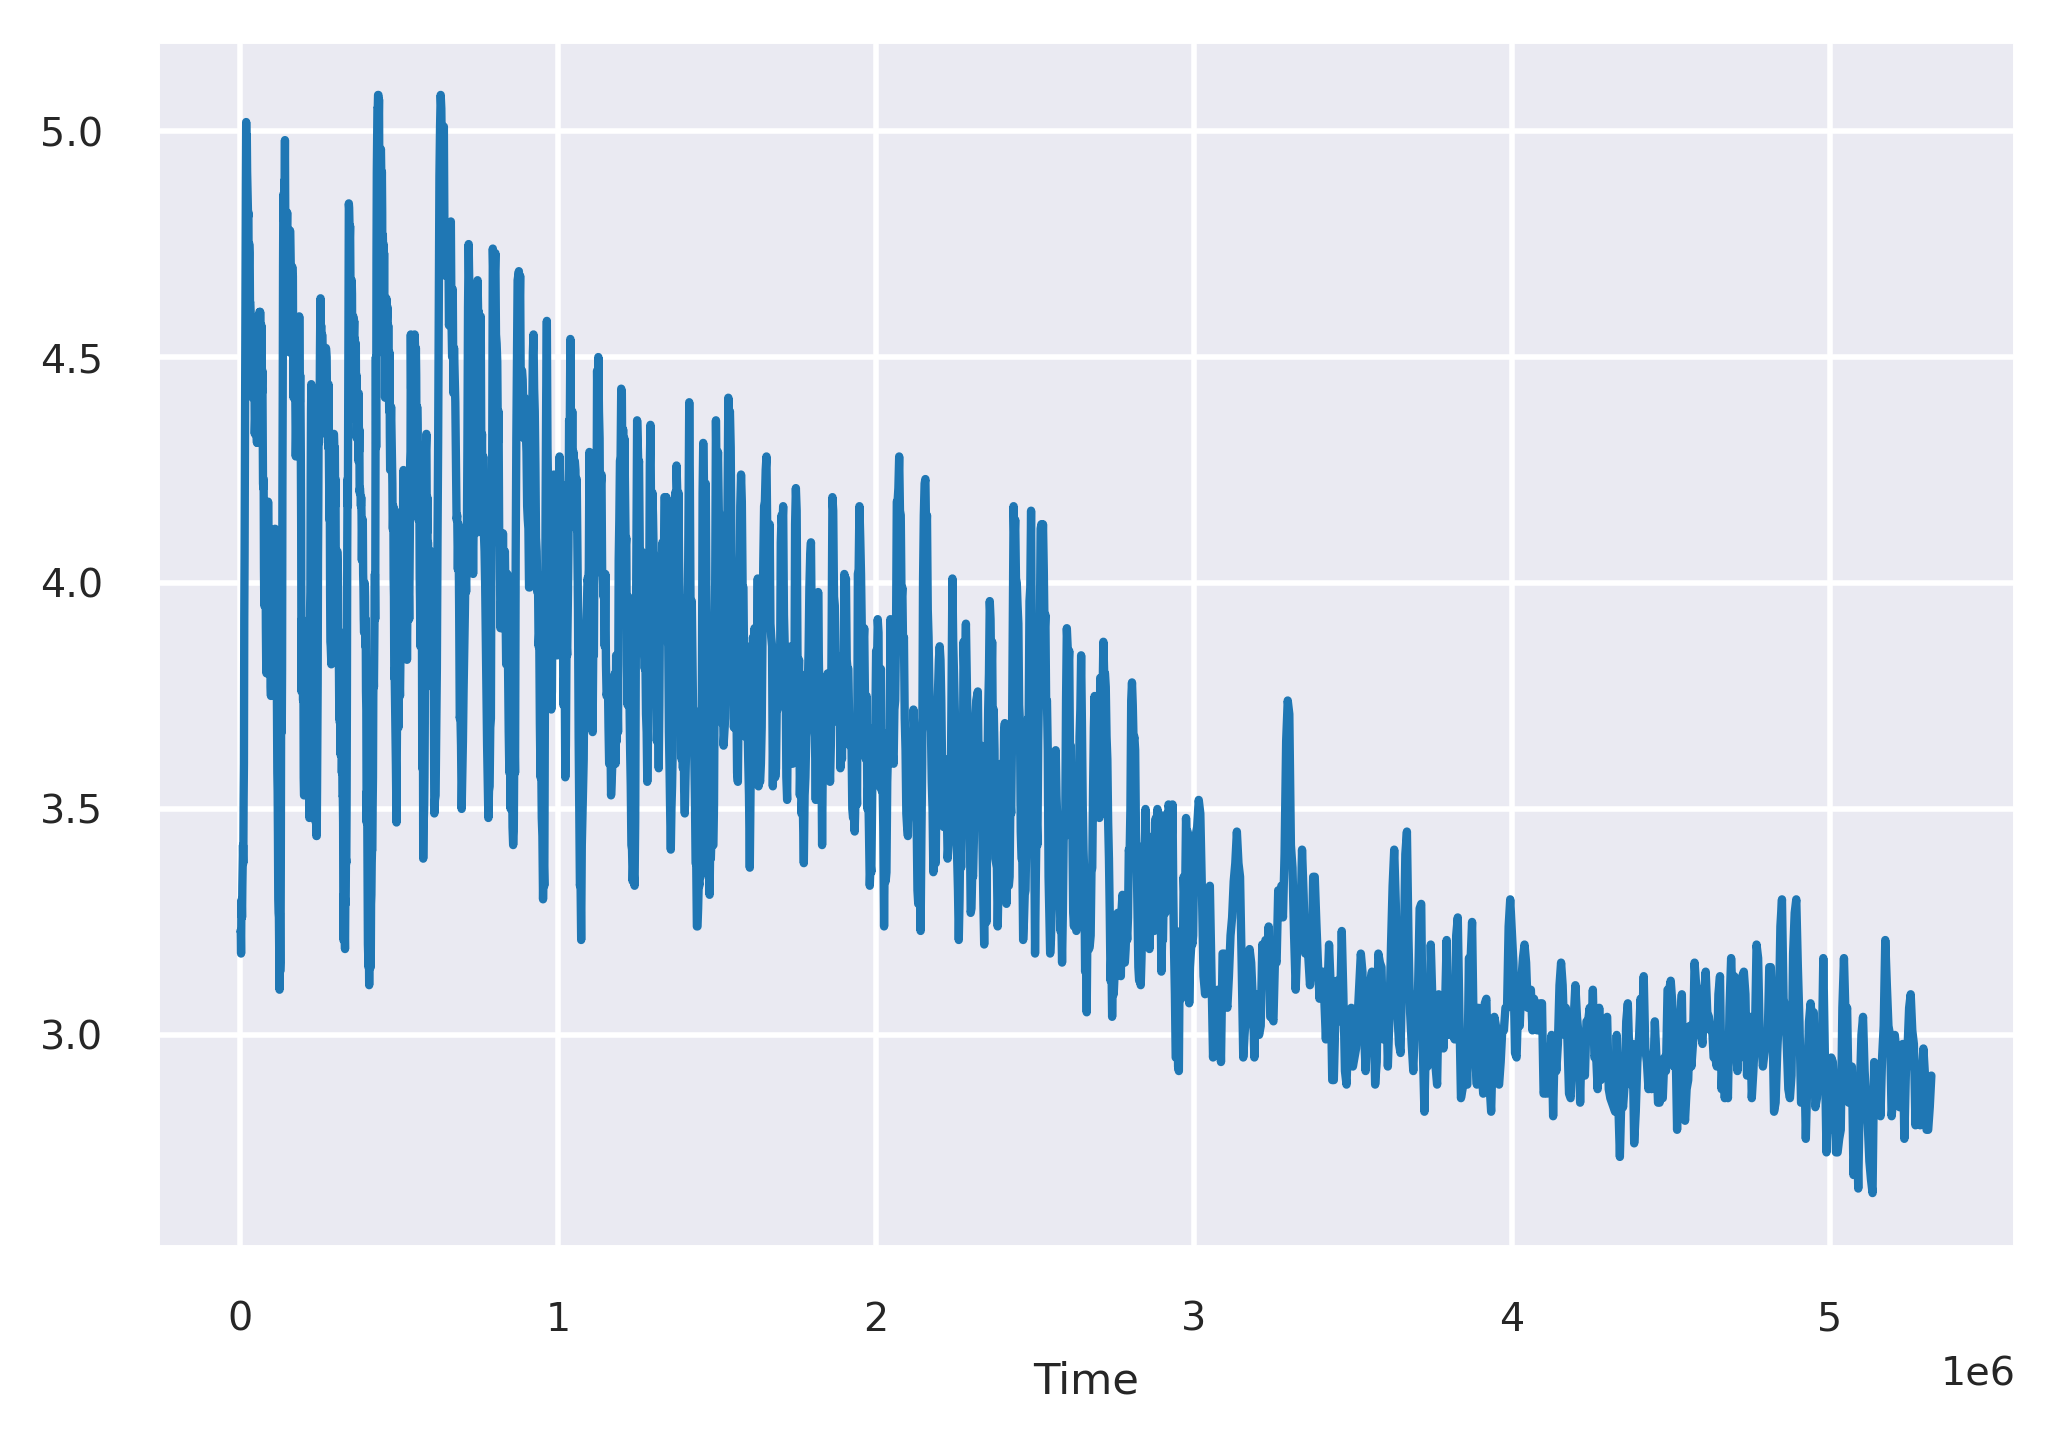

In [9]:
lr04_df['d18O'].plot()

Note the 1e6 in the lower right of the plot, showing that the x-axis values are in the millions.

Looks pretty good, but it needs a bit more before it's ready for primetime, right?

Within the pandas `DataFrame.plot` function, we can specify various plot options. 

For a full list see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html

Here's a few:

<AxesSubplot:title={'center':'LR04 benthic d18O stack'}, xlabel='Time (years before present)', ylabel='Benthic d18O (per mil)'>

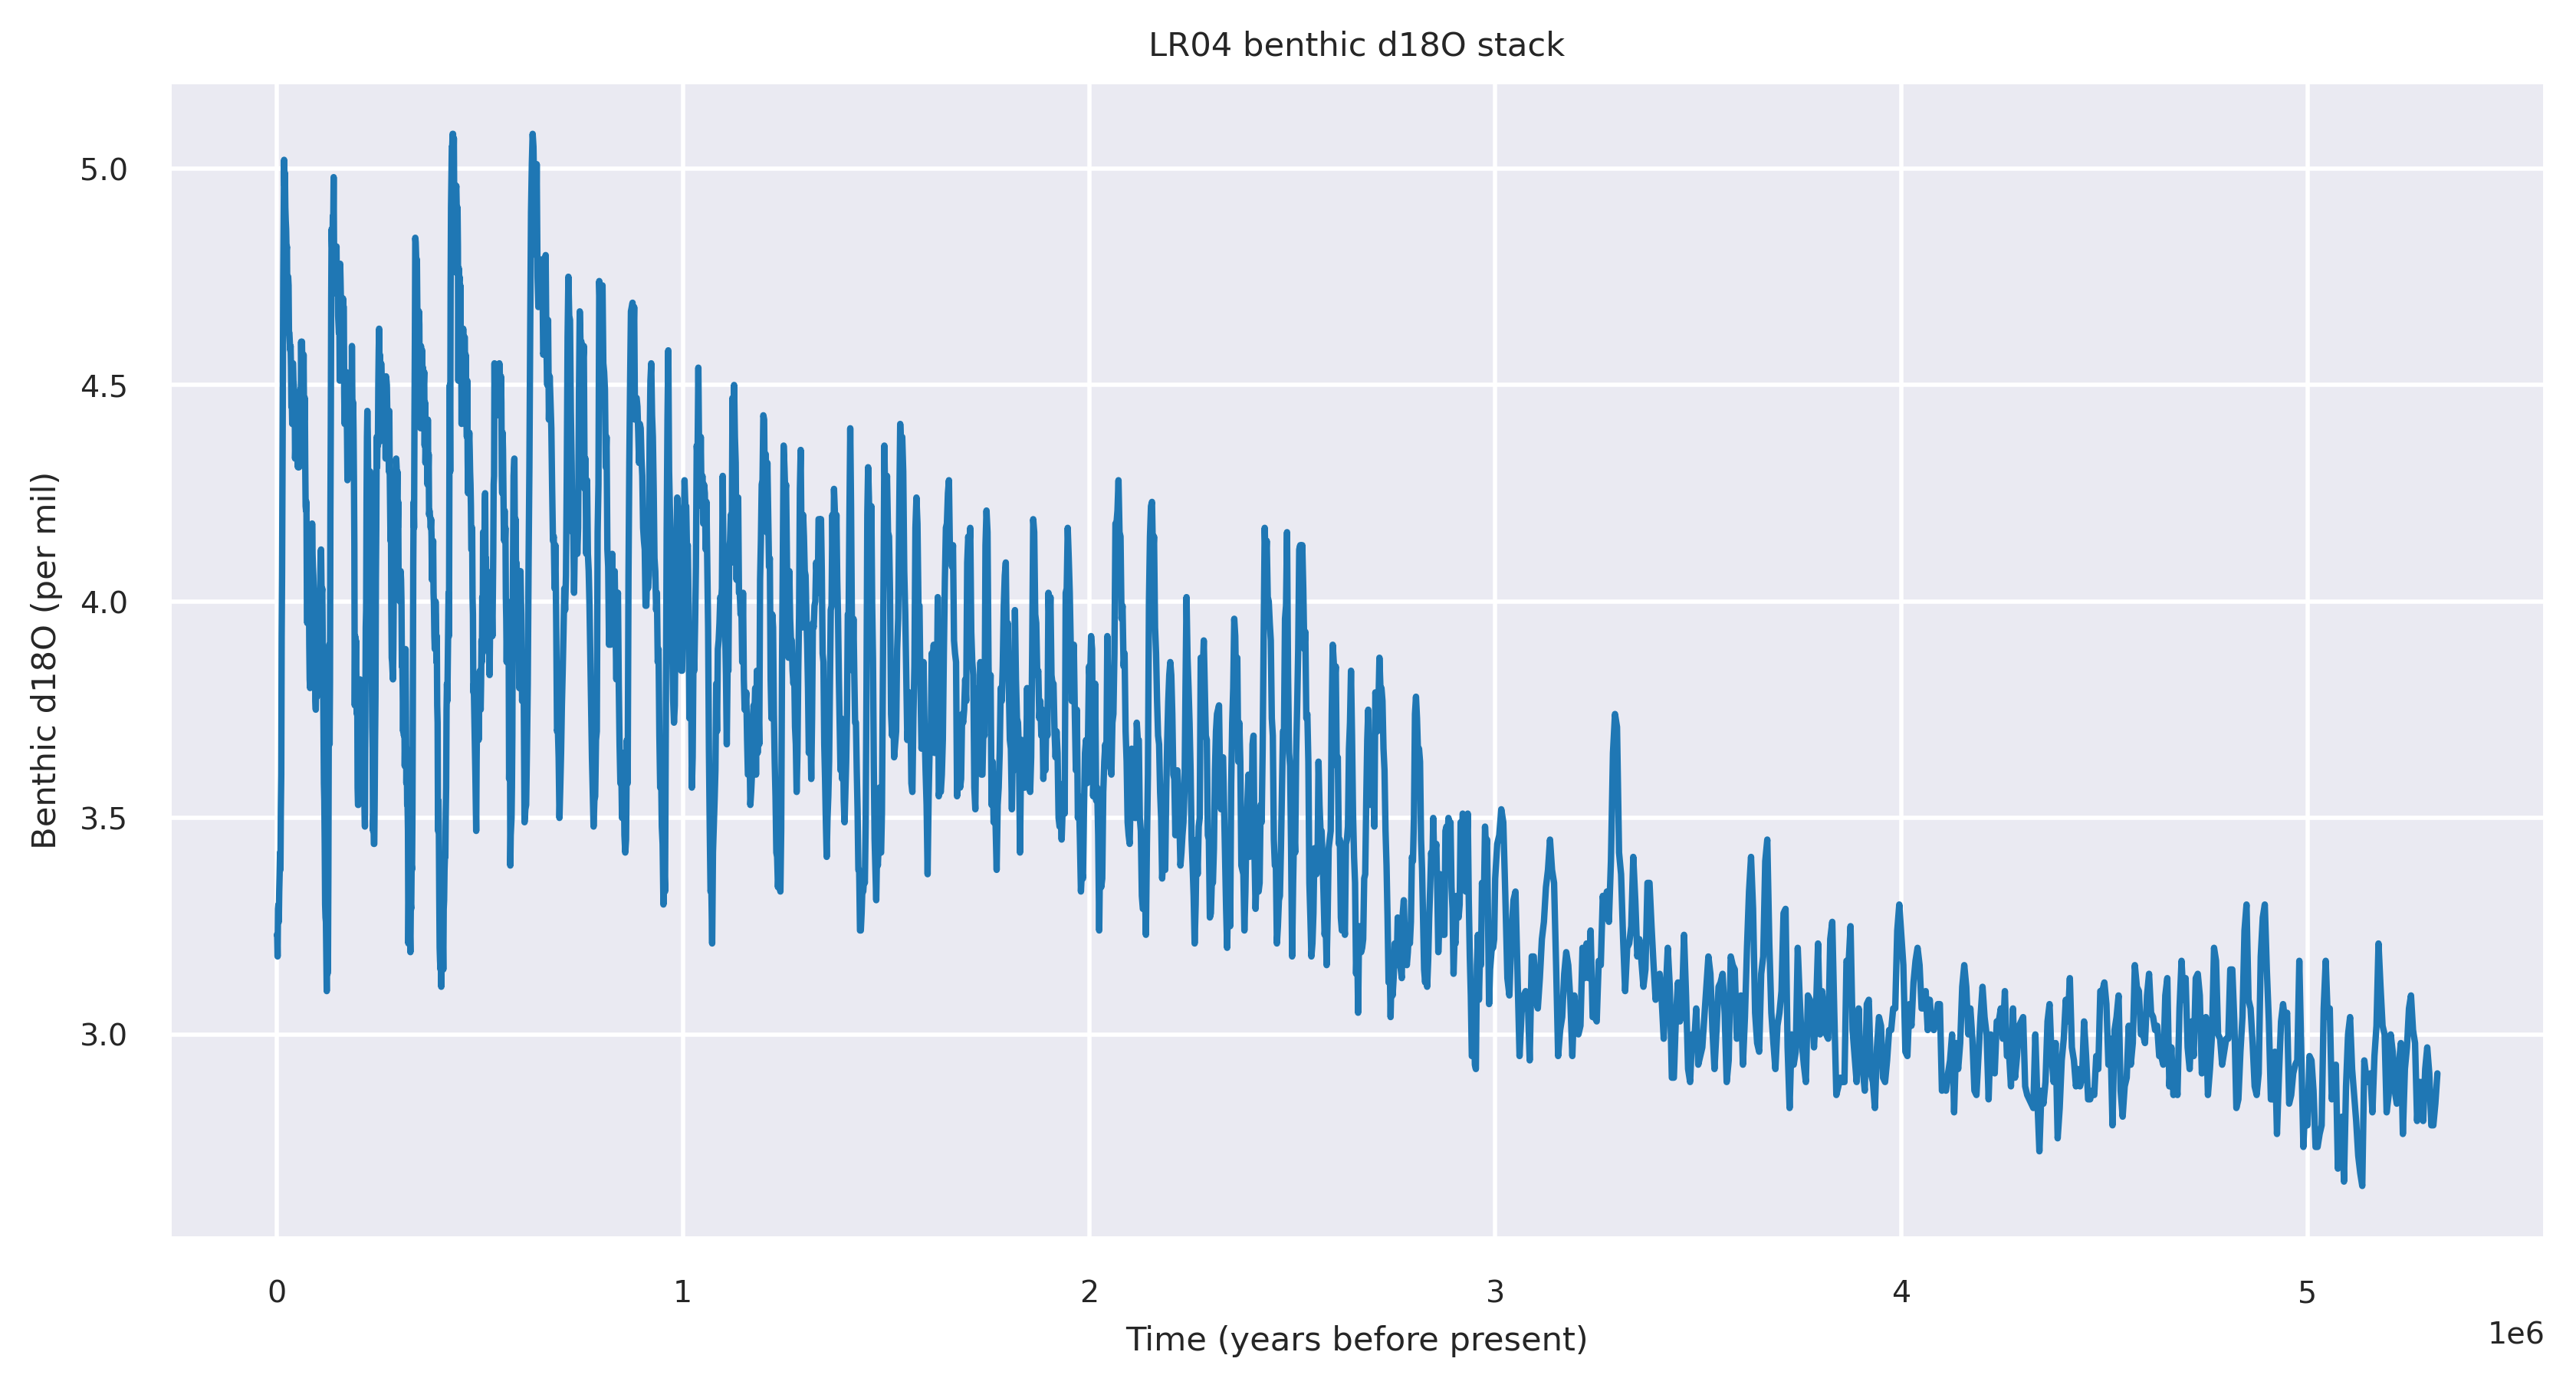

In [10]:
# plot again, but specify some parameters
# note, these could be on a single line, or as is shown here, just hit enter after the comma and you can put your parameters on multiple lines.
# just make sure to include your closing ')'

lr04_df['d18O'].plot(figsize=(10,5), 
                     xlabel='Time (years before present)', 
                     ylabel='Benthic d18O (per mil)', 
                     title='LR04 benthic d18O stack')

We could also set this up as a more standard `matplotlib` plot. This would allow us to make additional customizations. For example, if we wanted to plot more data, add additional axes, etc., this would be the better route to go.

* See this doc for how to make a simple plot: https://matplotlib.org/stable/gallery/lines_bars_and_markers/simple_plot.html

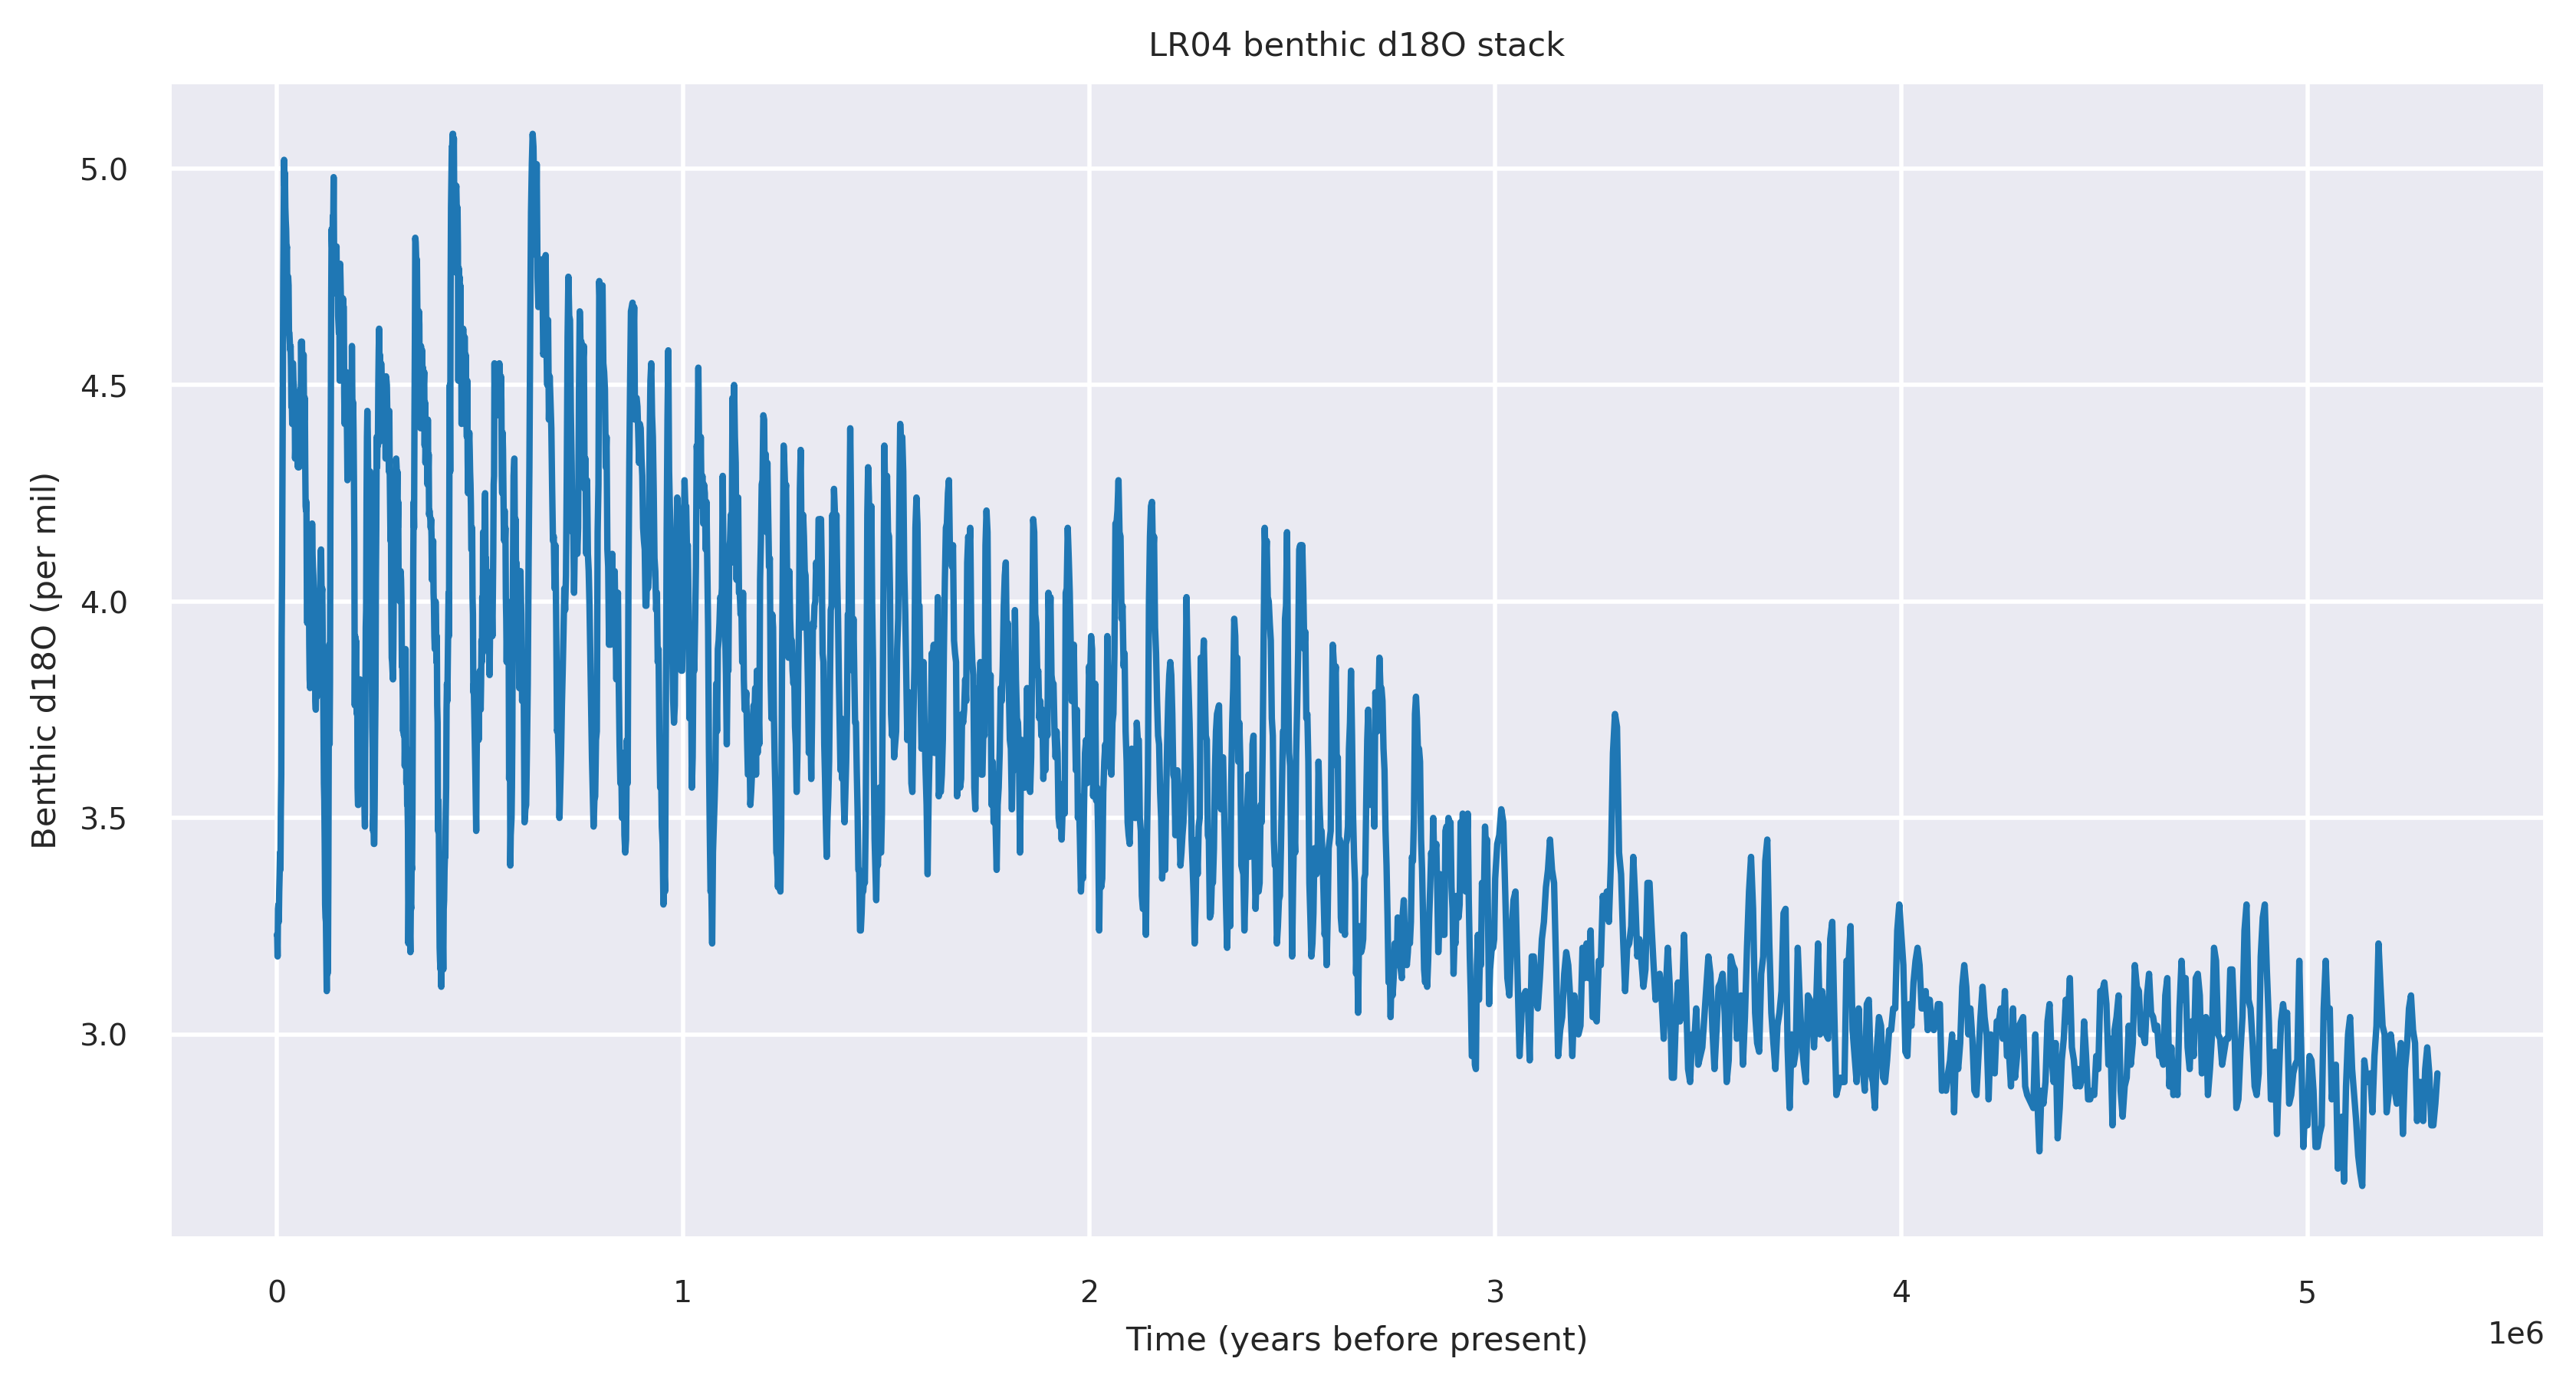

In [11]:
# Set up the same plot, but plot using matplotlib directly, rather than the pandas DataFrame.plot function

# create a figure and axis, and make it 2x as wide as tall.
fig, ax = plt.subplots(figsize=(10,5))

# Plot the data on the axis named ax
# Note that the `Axes.plot()` function of matplotlib normally takes both a x data and y data, 
# but since we've set time as our index, we don't need to specify it here and only need to specify the y data (d18O). 
ax.plot(lr04_df['d18O'])

# set axis and plot title properties
ax.set(xlabel='Time (years before present)', 
       ylabel='Benthic d18O (per mil)',
       title='LR04 benthic d18O stack')

# show the plot
plt.show()

Looks great! 

If you're wondering why we used `matplotlib.subplots` when we only have one plot, see: https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python 

***

# Practice sessions

## Part 1b: Load and plot Dome Fuji Data ice core data 

Data source: https://www1.ncdc.noaa.gov/pub/data/paleo/icecore/antarctica/domefuji/domefuji2018iso-temp.txt 

Local file: `data/domefuji2018iso-temp.txt`

1. Check out the dome fuji data structure to determine how it's formatted and if we need to skip some rows at the beginning of the text file.
2. Read the data using `pandas` 
    * Hint: note that the data are separated by tabs, not spaces. And as a result, if we want to use `read_csv` we'll need to specify this by using `sep='\t'` 
    * Alternatively, one could use the `pandas.read_table` function (https://pandas.pydata.org/docs/reference/api/pandas.read_table.html).
3. Make a plot of the data including a plot title and axis labels.

In [12]:
# Add your code here 

## Part 1c: Add a second y axis and plot both the LR04 and Fuji data on a single plot

To add a separate y-axis, we need to create a second axis variable as such: `ax2 = ax.twinx()`.

* this function creates a new y axis that shares a common x axis. 
* for more info see: https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html

Once you create that axis, you can use plot on it using `ax2.plot()` the same as we've been doing above with a single x axis using `ax.plot()`

Lastly, change a few plot parameters:
1. Set your lines to different colors using `color = 'namedcolor'` and a color name found here: https://matplotlib.org/3.1.0/gallery/color/named_colors.html
2. Turn off any grid lines for the second y axis using `ax2.grid(False)` 
3. Limit the x axis to between 0 and 700,000 years before present using `ax.set_xlim(0,700000)`


In [13]:
# Add your code here

## Part 1d: Read and plot Renland ice cap annualized d18O data

Data source: https://www.iceandclimate.nbi.ku.dk/data/Renland_annualized_d18O_data.xlsx 

Local file: `data/Renland_annualized_d18O_data.xlsx`

1. These data are in Excel format, so you'll need to use the `pandas.read_excel` function. 
    * This operates in much the same way as `read_csv`, but you'll want to specify a `sheet_name` in this case.
    * Also note that the "Age" column contains a space at the end (oops), so when referring to it, make sure to account for that space!
    * For reference see: https://pandas.pydata.org/docs/reference/api/pandas.read_excel.html
    

2. Make a plot showing the annualized summer and winter d18O data
    * add a legend as well, using `plt.legend()`


3. Calculate smoothed winter and summer time series then add these to a plot including the annual data.
    * Use the `pandas.DataFrame.rolling` function and specify a window of 10 years, then take the mean of across this rolling window using `.mean()`
        * For example, `sum_10yr = ren_df['d18O Summer'].rolling(10).mean()`
        * For reference, see: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rolling.html
    * In your plot, experiment with setting the color and width of the lines to differentiate the annual and smoothed time series. 
        * See above for how to set line colors.
        * Set line widths using, for example, `linewidth = 2`. Experiment with different widths. Make it such that the smoothed data are thicker than the annual data.
